In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## School district suspensions data come from the US Dept of Education Office of Civil Rights Data Collection

https://ocrdata.ed.gov/Home

## Load States Suspenions Data

In [75]:
from os import listdir

susp = listdir('suspensions/states')

# oss = out-of-school suspension
oss = pd.concat([pd.read_csv('suspensions/states/' + state) for state in susp]).reset_index(drop=True)

oss = oss.drop(columns=['SWD (IDEA-Eligible)', 'SWD (Section 504 only)', 'LEP'])

# Need to add 0's for district ID's with only 6 digits
oss['ID'] = oss['ID'].astype(str)
oss['ID'] = ['0' + row if len(row) < 7 else row for row in oss['ID']]

oss.loc[oss['Category'] == 'School days missed due to out-of-school suspension', 'Category'] = 'Suspensions'

oss.head(10)

,Lea State,LEA,ID,Year,Category,Sex,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total
0,AK,Craig City School District,0200090,2015,Suspensions,M,7.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0
1,AK,Craig City School District,0200090,2015,Suspensions,F,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,AK,Craig City School District,0200090,2015,Total enrollment,M,59.0,7.0,0.0,5.0,0.0,185.0,36.0,292.0
3,AK,Craig City School District,0200090,2015,Total enrollment,F,56.0,12.0,2.0,5.0,2.0,167.0,26.0,270.0
4,AK,Sitka School District,0200240,2015,Suspensions,M,18.0,0.0,0.0,0.0,0.0,19.0,0.0,37.0
5,AK,Sitka School District,0200240,2015,Suspensions,F,23.0,0.0,0.0,0.0,0.0,10.0,0.0,33.0
6,AK,Sitka School District,0200240,2015,Total enrollment,M,213.0,76.0,8.0,37.0,11.0,375.0,32.0,752.0
7,AK,Sitka School District,0200240,2015,Total enrollment,F,189.0,49.0,9.0,19.0,10.0,315.0,32.0,623.0
8,AK,Bering Strait School District,0200020,2015,Suspensions,M,327.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0
9,AK,Bering Strait School District,0200020,2015,Suspensions,F,150.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0


In [76]:
# Load geographic data from Common Core data file
counties = pd.read_csv('suspensions/counties/district_geo_data.csv', encoding='latin-1')

# Need to fix LEAID's that are missing 0's to match with suspension data
counties['LEAID'] = counties['LEAID'].astype(str)
counties['LEAID'] = ['0' + row if len(row) < 7 else row for row in counties['LEAID']]
counties.head()

,SURVYEAR,LEAID,FIPST,LSTREE,LCITY,LSTATE,LZIP,LZIP4,LATCODE,LONGCODE,CONUM,CONAME,CD,LOCALE,CSA,CBSA,NECTA,METMIC
0,2014,0100002,1,1000 INDUSTRIAL SCHOOL ROAD,MT. MEIGS,AL,36057,66.0,33.673661,-86.628755,1073,JEFFERSON COUNTY,106,41,142,13820,N,1
1,2014,0100005,1,107 WEST MAIN STREET,ALBERTVILLE,AL,35950,25.0,34.267500,-86.208600,1095,MARSHALL COUNTY,104,32,290,10700,N,2
2,2014,0100006,1,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976,9351.0,34.304968,-86.286673,1095,MARSHALL COUNTY,104,42,290,10700,N,2
3,2014,0100007,1,2810 METROPOLITAN WAY,HOOVER,AL,35243,5500.0,33.406200,-86.766900,1073,JEFFERSON COUNTY,106,13,142,13820,N,1
4,2014,0100008,1,211 CELTIC DRIVE,MADISON,AL,35758,1615.0,34.687312,-86.744874,1089,MADISON COUNTY,105,21,290,26620,N,1


### Merge district geographic data with suspension data

In [77]:
susp = oss.merge(counties, left_on='ID', right_on='LEAID', copy=False)

drops = ['SURVYEAR', 'FIPST', 'LEAID', 'LSTATE', 'LSTREE', 'LZIP', 'LZIP4', 'LATCODE', 'LONGCODE',
         'CD', 'LOCALE', 'CBSA', 'CSA', 'NECTA', 'METMIC']

susp = susp.drop(columns=drops)

# Append state abbreviations to city and county names
# to avoid grouping together cities/counties with same names from different states
susp['LCITY'] = susp['LCITY'] + ', ' + susp['Lea State']
susp['CONAME'] = susp['CONAME'] + ', ' + susp['Lea State']
susp.head()

,Lea State,LEA,ID,Year,Category,Sex,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,LCITY,CONUM,CONAME
0,AK,Craig City School District,0200090,2015,Suspensions,M,7.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,"CRAIG, AK",2198,"PRINCE OF WALES-HYDER CENSUS AREA, AK"
1,AK,Craig City School District,0200090,2015,Suspensions,F,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"CRAIG, AK",2198,"PRINCE OF WALES-HYDER CENSUS AREA, AK"
2,AK,Craig City School District,0200090,2015,Total enrollment,M,59.0,7.0,0.0,5.0,0.0,185.0,36.0,292.0,"CRAIG, AK",2198,"PRINCE OF WALES-HYDER CENSUS AREA, AK"
3,AK,Craig City School District,0200090,2015,Total enrollment,F,56.0,12.0,2.0,5.0,2.0,167.0,26.0,270.0,"CRAIG, AK",2198,"PRINCE OF WALES-HYDER CENSUS AREA, AK"
4,AK,Sitka School District,0200240,2015,Suspensions,M,18.0,0.0,0.0,0.0,0.0,19.0,0.0,37.0,"SITKA, AK",2220,"SITKA CITY AND BOROUGH, AK"


### Calculate the suspension rate (suspension days/enrollment) by gender, average by county

In [78]:
demog = ['American Indian or Alaska Native', 'Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black',
         'White', 'Two or more races', 'Total']

def sex(df, s):
    return df[df['Sex'] == s].reset_index(drop=True)

male = sex(susp, 'M')
female = sex(susp, 'F')

male[demog] = male[demog] + female[demog]

tot = male.drop(columns=['Sex'])

def sep_cats(df, catg):
    return df[df['Category'] == catg].reset_index(drop=True)

tot_sus = sep_cats(tot, 'Suspensions')
tot_enr = sep_cats(tot, 'Total enrollment')

tot = tot_sus.join(tot_enr[demog], lsuffix='_suspensions', rsuffix='_enrollment')

tot = tot[['CONAME', 'American Indian or Alaska Native_suspensions', 'American Indian or Alaska Native_enrollment',
           'Asian_suspensions', 'Asian_enrollment', 'Hawaiian/ Pacific Islander_suspensions',
           'Hawaiian/ Pacific Islander_enrollment', 'Hispanic_suspensions', 'Hispanic_enrollment',
           'Black_suspensions', 'Black_enrollment', 'White_suspensions', 'White_enrollment',
           'Two or more races_suspensions', 'Two or more races_enrollment', 'Total_suspensions',
           'Total_enrollment']]


def susp_rate(df):
    for race in demog:
        df[race + '_suspension rate'] = df[race + '_suspensions'] / df[race + '_enrollment']
    return df.fillna(0)

tot_rates = susp_rate(tot)

tot_rates = tot_rates[['CONAME', 'Total_suspensions', 'Total_enrollment', 'Total_suspension rate',
                       'American Indian or Alaska Native_suspensions','American Indian or Alaska Native_enrollment',
                       'American Indian or Alaska Native_suspension rate', 'Asian_suspensions', 'Asian_enrollment',
                       'Asian_suspension rate', 'Hawaiian/ Pacific Islander_suspensions',
                       'Hawaiian/ Pacific Islander_enrollment', 'Hawaiian/ Pacific Islander_suspension rate',
                       'Hispanic_suspensions', 'Hispanic_enrollment', 'Hispanic_suspension rate', 'Black_suspensions',
                       'Black_enrollment', 'Black_suspension rate', 'White_suspensions', 'White_enrollment',
                       'White_suspension rate', 'Two or more races_suspensions', 'Two or more races_enrollment',
                       'Two or more races_suspension rate']]

county_rates = tot_rates.groupby('CONAME').mean().reset_index()
county_rates.head()

,CONAME,Total_suspensions,Total_enrollment,Total_suspension rate,American Indian or Alaska Native_suspensions,American Indian or Alaska Native_enrollment,American Indian or Alaska Native_suspension rate,Asian_suspensions,Asian_enrollment,Asian_suspension rate,...,Hispanic_suspension rate,Black_suspensions,Black_enrollment,Black_suspension rate,White_suspensions,White_enrollment,White_suspension rate,Two or more races_suspensions,Two or more races_enrollment,Two or more races_suspension rate
0,"ABBEVILLE COUNTY, SC",412.00,3038.0,0.135616,0.00,8.00,0.00000,1.0,16.0,0.062500,...,0.000000,219.00,983.00,0.222787,178.00,1886.00,0.094380,14.0,86.0,0.162791
1,"ACADIA PARISH, LA",6563.00,10111.0,0.649095,0.00,33.00,0.00000,0.0,24.0,0.000000,...,0.272374,3959.00,2655.00,1.491149,2261.00,6739.00,0.335510,273.0,401.0,0.680798
2,"ACCOMACK COUNTY, VA",1724.00,5369.0,0.321103,0.00,13.00,0.00000,1.0,46.0,0.021739,...,0.101950,1046.00,1921.00,0.544508,507.00,2105.00,0.240855,55.0,150.0,0.366667
3,"ADA COUNTY, ID",750.75,17359.0,0.035898,5.75,109.25,0.03321,3.5,470.5,0.003256,...,0.060459,45.25,390.25,0.050447,556.25,13852.75,0.033120,18.5,563.0,0.023964
4,"ADAIR COUNTY, IA",12.50,435.5,0.024276,0.00,3.00,0.00000,0.0,4.0,0.000000,...,0.000000,0.00,4.00,0.000000,12.50,400.00,0.026442,0.0,12.0,0.000000


## Load evictions data for counties

#### Data come from the Eviction Lab at Princeton, the first comprehensive national database of court evictions data
#### https://evictionlab.org/
#### Variable Descriptions:
-https://eviction-lab-data-downloads.s3.amazonaws.com/DATA_DICTIONARY.txt

In [79]:
counties = pd.read_csv('evictions/cities/USA_counties.csv').dropna()

counties = counties[counties['year'] == 2015]

state_abbrevs = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR',
                 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
                 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI',
                 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
                 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
                 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
                 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
                 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH',
                 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI',
                 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
                 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
                 'Wisconsin': 'WI', 'Wyoming': 'WY'}

# All caps to match the county school district data
counties['parent-location'] = [state_abbrevs.get(row) for row in counties['parent-location']]
counties['name'] = counties['name'].str.upper() + ', ' + counties['parent-location'].str.upper()

counties.head()

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
15,1001,2015,"AUTAUGA COUNTY, AL",AL,55221.0,9.28,5307.0,26.08,883.0,51281.0,...,0.01,1.53,0.14,147.0,88.0,1.66,2.77,0,0,0
32,1003,2015,"BALDWIN COUNTY, AL",AL,195121.0,9.63,23302.0,28.48,879.0,50254.0,...,0.00,1.58,0.10,649.0,476.0,2.04,2.79,0,0,0
49,1005,2015,"BARBOUR COUNTY, AL",AL,26932.0,19.54,3327.0,36.41,579.0,32964.0,...,0.00,1.31,0.50,28.0,16.0,0.48,0.84,0,0,0
66,1007,2015,"BIBB COUNTY, AL",AL,22604.0,12.84,2077.0,24.89,651.0,38678.0,...,0.00,1.37,0.00,43.0,32.0,1.54,2.07,0,0,0
83,1009,2015,"BLOUNT COUNTY, AL",AL,57710.0,12.26,4498.0,21.10,601.0,45813.0,...,0.00,1.46,0.07,67.0,48.0,1.07,1.49,0,0,0


### Merge county evictions data with suspension data

In [80]:
evct_susp = counties.merge(county_rates, left_on='name', right_on='CONAME', copy=False)

# Remove counties that reported no suspensions or evictions
def remove_zeros(df):
    df = df[(df['eviction-rate'] > 0) & (df['eviction-filing-rate'] > 0) & (df['Total_suspension rate'] > 0)]
    df = df.drop(columns=['low-flag', 'imputed', 'subbed', 'CONAME', 'parent-location', 'year', 'GEOID'])
    return df

evct_susp = remove_zeros(evct_susp)
evct_susp.describe()

,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,Hispanic_suspension rate,Black_suspensions,Black_enrollment,Black_suspension rate,White_suspensions,White_enrollment,White_suspension rate,Two or more races_suspensions,Two or more races_enrollment,Two or more races_suspension rate
count,2.005000e+03,2005.000000,2.005000e+03,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,...,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,1.247259e+05,12.035242,1.759729e+04,28.539845,714.936160,47173.483791,137643.441397,29.101297,78.872279,9.000359,...,0.136432,866.108022,1307.037749,0.370233,527.317892,3261.322286,0.164138,65.950908,230.403400,0.192623
std,3.732031e+05,5.182603,6.300688e+04,7.725146,182.003166,11810.210648,74141.207206,3.853099,18.074770,13.855325,...,0.185819,3441.824747,5643.825897,0.521843,1146.779180,6201.333837,0.198825,230.736785,784.268402,0.329438
min,1.862000e+03,2.580000,1.840000e+02,7.350000,343.000000,19328.000000,35500.000000,15.900000,7.280000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,1.644500e+04,8.230000,1.722000e+03,23.230000,595.000000,39459.000000,91700.000000,26.700000,68.490000,0.700000,...,0.024353,1.000000,15.500000,0.045455,68.750000,868.000000,0.059533,0.500000,24.000000,0.012195
50%,3.426700e+04,11.290000,3.783000e+03,27.320000,669.000000,45644.000000,117700.000000,29.100000,85.200000,2.540000,...,0.087467,21.600000,69.000000,0.246377,197.500000,1636.750000,0.117037,7.500000,57.000000,0.108108
75%,8.690100e+04,14.690000,1.056800e+04,32.260000,786.000000,52374.000000,159700.000000,31.400000,93.420000,10.770000,...,0.180559,300.000000,629.000000,0.513520,482.000000,3101.250000,0.203519,40.000000,158.000000,0.256410
max,1.003839e+07,44.320000,1.776232e+06,70.730000,1827.000000,123453.000000,902500.000000,50.000000,99.500000,85.950000,...,2.240956,56854.000000,106094.000000,10.659091,16777.000000,85530.000000,3.814702,6460.000000,20749.000000,7.500000


### Histogram showing distributions of county-level evictions

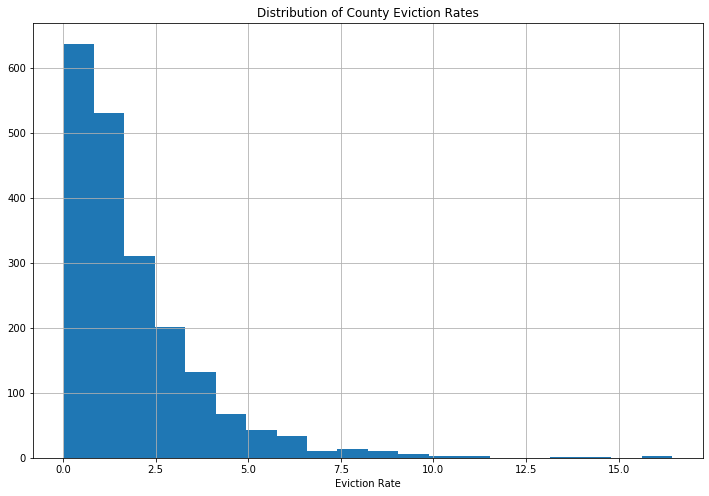

In [81]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

x = evct_susp['eviction-rate']

plt.hist(x, bins=20)
plt.title('Distribution of County Eviction Rates')
plt.xlabel('Eviction Rate')
plt.grid()
plt.show()

### Correlation matrix of demographics, evictions data, and suspensions data

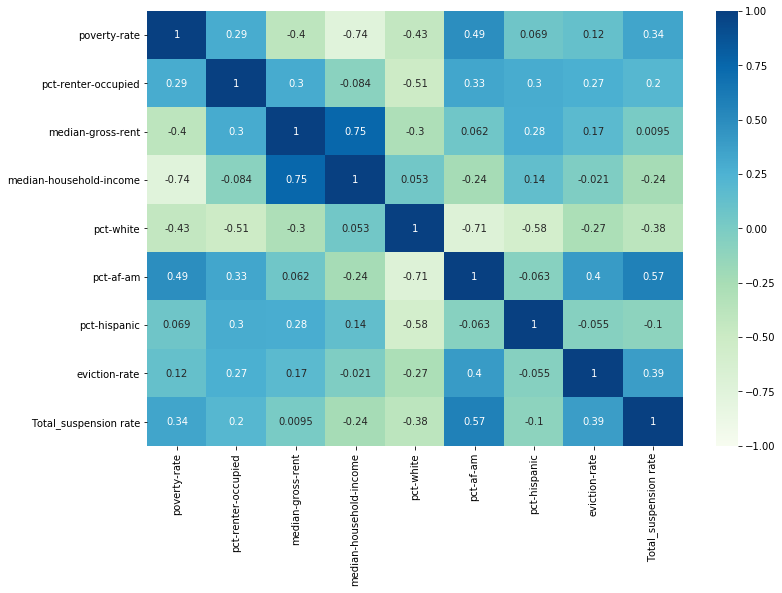

In [82]:
import seaborn as sns

corr = evct_susp[['poverty-rate', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income',
                 'pct-white', 'pct-af-am', 'pct-hispanic', 'eviction-rate', 'Total_suspension rate']].corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='GnBu')

### Scatterplot for # evictions and # suspension days

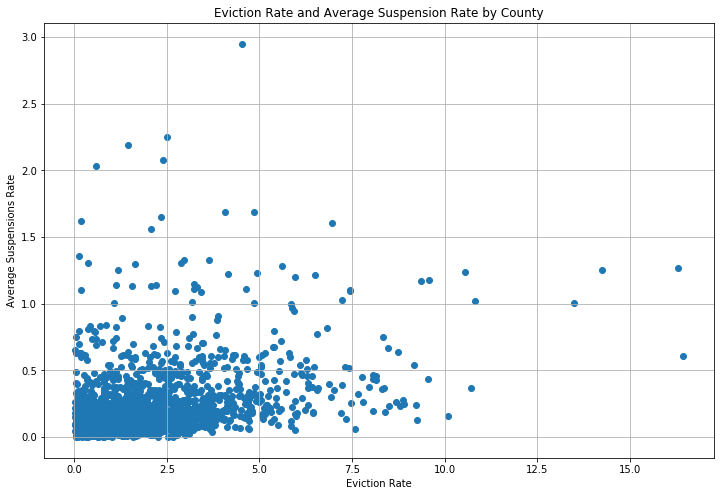

In [83]:
X = evct_susp['eviction-rate']
y = evct_susp['Total_suspension rate']

plt.scatter(X, y)
plt.title('Eviction Rate and Average Suspension Rate by County')
plt.xlabel('Eviction Rate')
plt.ylabel('Average Suspensions Rate')
plt.grid()
plt.show()

There seems to be a positive, but not very strong relationship. There may be additional variables not included in the scatterplot that may be important.

In [84]:
evct_susp[['eviction-rate']].describe()

,eviction-rate
count,2005.000000
mean,1.893810
std,1.802584
min,0.010000
25%,0.660000
50%,1.360000
75%,2.560000
max,16.450000


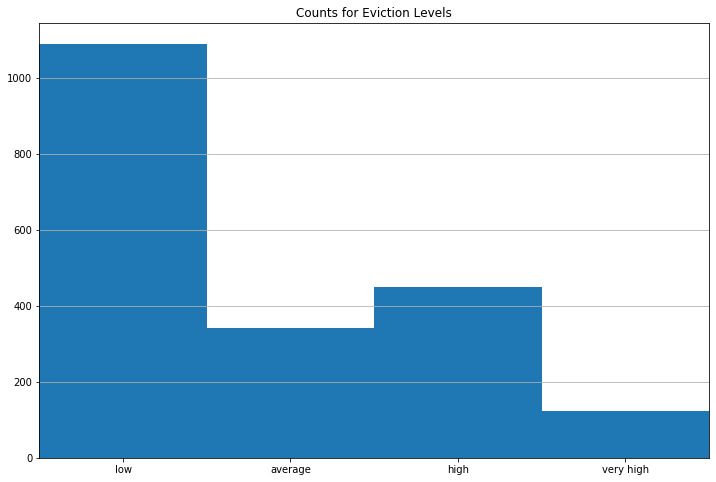

In [85]:
# Create eviction level column to categorize the data into low, average, and high

evct_susp['eviction level'] = pd.cut(evct_susp['eviction-rate'], bins=[0, 1.5, 2.35, 5, 17],
                                     labels=['low', 'average', 'high', 'very high'])

def bins_labels(bins):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), ['low', 'average', 'high', 'very high'])
    plt.xlim(bins[0], bins[-1])

bins = range(5)

plt.hist(evct_susp['eviction level'].sort_values(), bins=bins)
plt.title('Counts for Eviction Levels')
plt.grid(axis='y')
bins_labels(bins)
plt.show()

In [86]:
evct_susp[['Black_suspension rate', 'White_suspension rate', 'Total_suspension rate']].describe()

,Black_suspension rate,White_suspension rate,Total_suspension rate
count,2005.000000,2005.000000,2005.000000
mean,0.370233,0.164138,0.214024
std,0.521843,0.198825,0.248975
min,0.000000,0.000000,0.000443
25%,0.045455,0.059533,0.067993
50%,0.246377,0.117037,0.140171
75%,0.513520,0.203519,0.262093
max,10.659091,3.814702,2.949467


In [87]:
evct_susp['suspension level'] = pd.cut(evct_susp['Total_suspension rate'], bins=[0, .05, .15, .25, 3],
                                       labels=['low', 'average', 'high', 'very high'])

evct_susp['suspension level'].value_counts().sort_index()

low          352
average      711
high         407
very high    535
Name: suspension level, dtype: int64


### Decision Tree Classification Algorithm for County Evictions

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

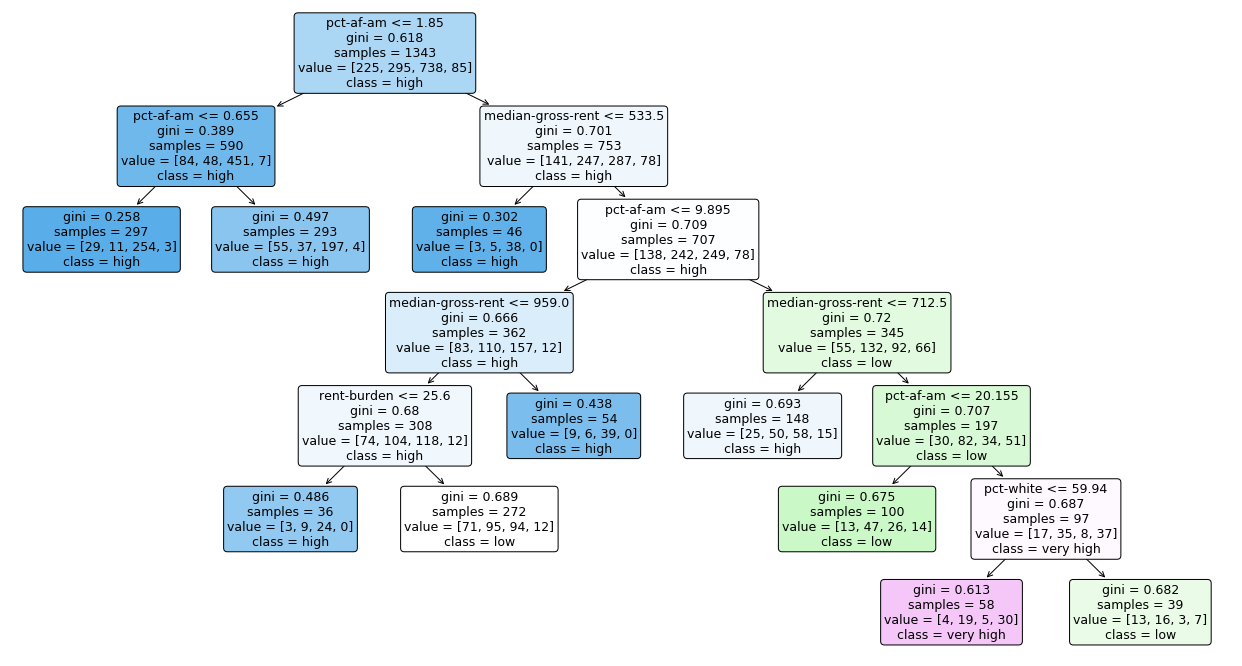

In [89]:
plt.figure(figsize=(22, 12))

X_evct = evct_susp[['poverty-rate', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income', 'rent-burden',
               'pct-white', 'pct-af-am', 'pct-hispanic']].copy()

y_evct = evct_susp['eviction level'].copy()


X_train, X_test, y_train, y_test = train_test_split(X_evct, y_evct, test_size=0.33, random_state=17)

evct_tree = DecisionTreeClassifier(max_leaf_nodes=10).fit(X_train, y_train)

evct_plot = plot_tree(evct_tree, feature_names=X_evct.columns, class_names=y_evct.values.unique(),
                 filled=True, rounded=True, fontsize=12.5)

In [90]:
evct_preds = evct_tree.predict(X_test)

evct_preds_acc = accuracy_score(y_true=y_test, y_pred=evct_preds)
print('Eviction Level Decision Tree Accuracy Score:', evct_preds_acc)

Eviction Level Decision Tree Accuracy Score: 0.581570996978852


### Decision Tree Classification for school suspensions using evictions data

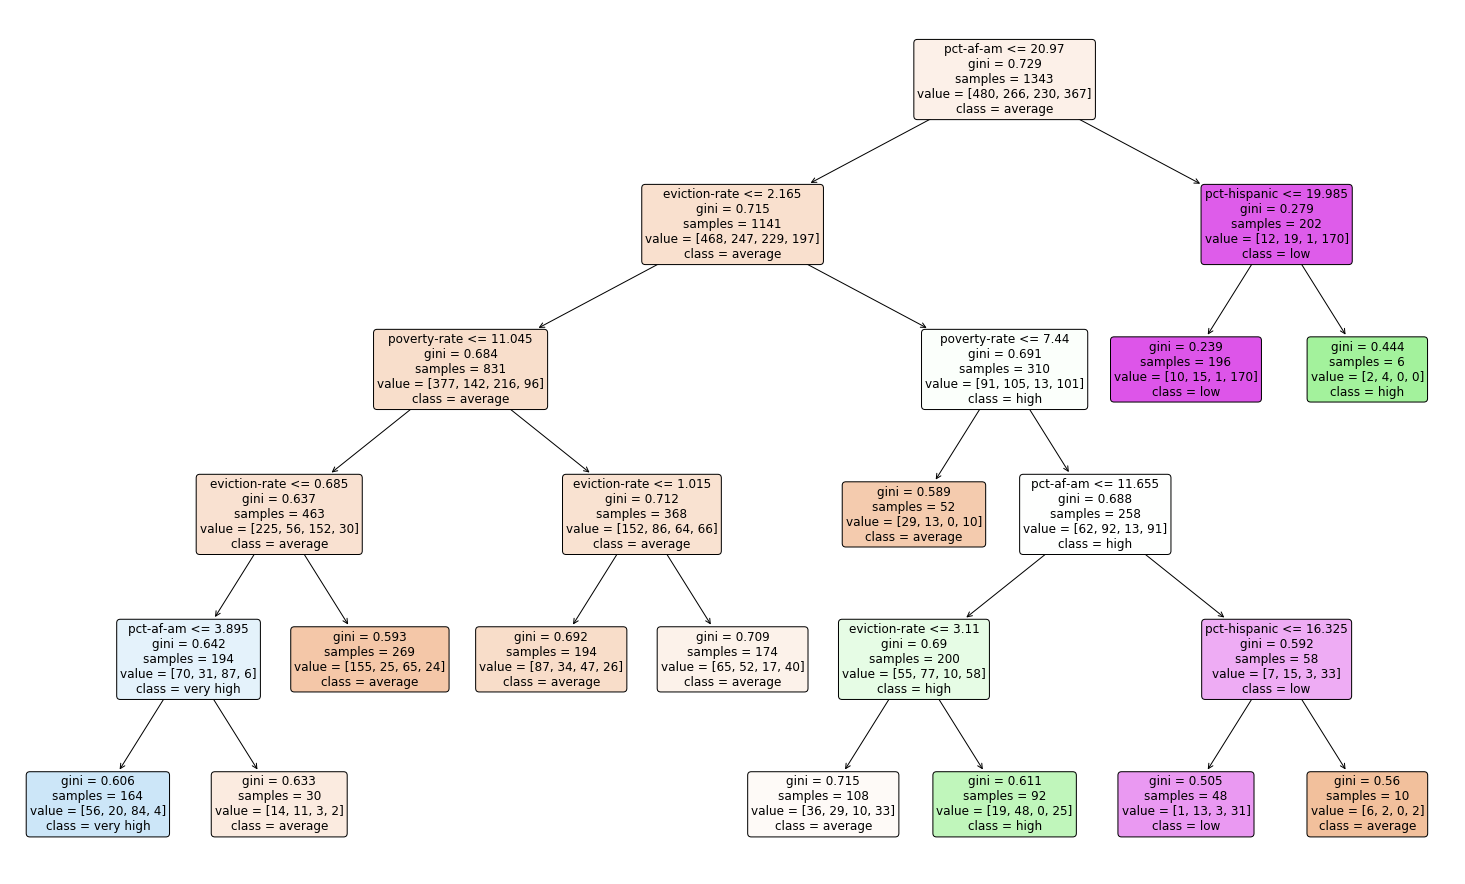

In [91]:
plt.figure(figsize=(26, 16))

X_susp = evct_susp[['poverty-rate', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income',
               'pct-white', 'pct-af-am', 'pct-hispanic', 'eviction-rate']].copy()

y_susp = evct_susp['suspension level'].copy()


X_train, X_test, y_train, y_test = train_test_split(X_susp, y_susp, test_size=0.33, random_state=728)

susp_tree = DecisionTreeClassifier(max_leaf_nodes=12).fit(X_train, y_train)

susp_plot = plot_tree(susp_tree, feature_names=X_susp.columns, class_names=y_susp.values.unique(),
                      filled=True, rounded=True, fontsize=12)

In [92]:
susp_preds = susp_tree.predict(X_test)

susp_preds_acc = accuracy_score(y_test, susp_preds)
print('Suspension Level Decision Tree Accuracy Score:', susp_preds_acc)

Suspension Level Decision Tree Accuracy Score: 0.48338368580060426


### Regression Model using Eviction Rates to Predict Suspensions

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

indicators = ['poverty-rate', 'eviction-rate', 'pct-renter-occupied', 'median-gross-rent',
                      'pct-white', 'pct-af-am', 'pct-hispanic']


X_susreg = evct_susp[indicators].copy()

y_susreg = evct_susp['Total_suspension rate'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_susreg, y_susreg, test_size=0.33, random_state=185)


susreg = LinearRegression().fit(X_train, y_train)
y_susreg_preds = susreg.predict(X_test)

print('R-squared Value for predictions (coefficient of determination):', r2_score(y_test, y_susreg_preds))

# setting squared=False for MSE returns RMSE
print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, y_susreg_preds, squared=False))

R-squared Value for predictions (coefficient of determination): 0.38320267728015545
Root Mean Squared Error (RMSE): 0.18780580419708232


### StatsModels is useful for Generating Linear Regression summary tables
#### Identify which variables have the strongest effect on suspensions, and their significance levels
##### Note that this regression model is run for the entire dataset without splitting into training and test sets

In [94]:
import statsmodels.api as sm

# Need to add constant to add y-intercept to the model
X_susreg = sm.add_constant(X_susreg)

smreg = sm.OLS(y_susreg, X_susreg).fit()
print(smreg.summary())

                              OLS Regression Results                             
Dep. Variable:     Total_suspension rate   R-squared:                       0.371
Model:                               OLS   Adj. R-squared:                  0.369
Method:                    Least Squares   F-statistic:                     168.2
Date:                   Sun, 23 Aug 2020   Prob (F-statistic):          8.18e-196
Time:                           13:01:44   Log-Likelihood:                 407.94
No. Observations:                   2005   AIC:                            -799.9
Df Residuals:                       1997   BIC:                            -755.1
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons